<a href="https://colab.research.google.com/github/gnaneswar-18/machine-learning/blob/main/LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

****Linear Discriminant Analysis (LDA)****

LDA is a supervised dimensionality reduction and classification technique. Its primary purpose is to find a linear combination of features that best separates two or more classes in a dataset.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

***Step 1: Data Collection***

In [ ]:
X = np.array([
    [2.0, 3.5, 'A'],
    [1.5, 2.5, 'A'],
    [3.0, 4.0, 'A'],
    [2.5, 3.8, 'A'],
    [3.5, 2.0, 'B'],
    [4.0, 2.7, 'B'],
    [5.0, 3.0, 'B'],
    [4.5, 2.5, 'B']
])
df = pd.DataFrame(X,columns  = ['f1','f2','class'])
df

,f1,f2,class
0,2.0,3.5,A
1,1.5,2.5,A
2,3.0,4.0,A
3,2.5,3.8,A
4,3.5,2.0,B
5,4.0,2.7,B
6,5.0,3.0,B
7,4.5,2.5,B


The main goal of LDA is to find a lower-dimensional subspace that maximizes the separation between different classes while preserving the information that is relevant for discrimination.

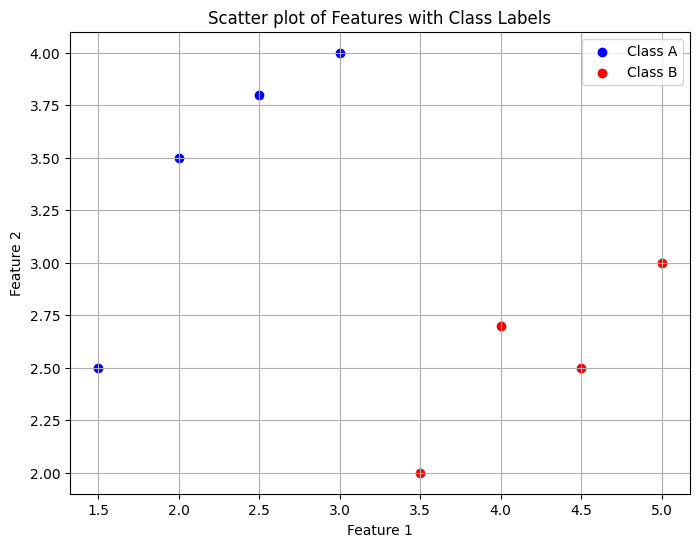

In [ ]:
# Separate features and labels
features = X[:, :2].astype(float)
labels = X[:, 2]

# Create scatter plot
plt.figure(figsize=(8, 6))

# Plot A in blue and B in red
plt.scatter(features[labels == 'A', 0], features[labels == 'A', 1], color='blue', label='Class A')
plt.scatter(features[labels == 'B', 0], features[labels == 'B', 1], color='red', label='Class B')

plt.title('Scatter plot of Features with Class Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

**Why LDA**

LDA is supervised, meaning it requires knowledge of class labels or categories. It seeks to find the directions (linear combinations of features) in the data space that best discriminate between classes. LDA maximizes the ratio of the between-class variance to the within-class variance. It does so by finding linear combinations of features that maximize the separability between classes.

However a question would be, what is LDAs difference to PCA.
While LDA is **oriented toward classification and maximizing class separation**,
PCA is **more general and focused on capturing data variance**

Linear Discriminant Analysis (LDA) is a supervised dimensionality reduction technique. It is primarily used for feature selection and reducing the dimensionality of a dataset while preserving the class separability. Unlike Principal Component Analysis (PCA), which focuses on maximizing the variance in the data, LDA aims to maximize the separability between different classes in a classification problem.

**Why LDA is good**

There are several reasons why LDA is a powerful dimensionality reduction technique:

1. Class Separation: LDA maximizes the separation between classes, making it particularly effective for classification tasks. It helps reduce the overlap between classes in the reduced-dimensional space.

2. Preserves Discriminative Information: LDA focuses on retaining the features that are most relevant for distinguishing between classes, which can lead to better classification performance.

3. Supervised Learning: LDA utilizes class labels to guide the dimensionality reduction process, making it suitable for tasks where class information is available.

**How to Use LDA**

Using LDA for dimensionality reduction involves the following steps:

1. Data Preprocessing: Prepare your dataset, ensuring it’s clean, and feature scaling may be required.

2. Compute Class Means and Scatter Matrices: Calculate the mean vectors and scatter matrices for each class in the dataset.

3. Compute Eigenvectors and Eigenvalues: Find the eigenvectors and eigenvalues of the generalized eigenvalue problem formed using the scatter matrices.

4. Sort Eigenvalues: Sort the eigenvalues in descending order and select the top k eigenvectors corresponding to the k largest eigenvalues to form a transformation matrix.

5. Project Data: Project your data onto the new k-dimensional subspace formed by the transformation matrix.

**Advantages and Disadvantages of LDA**

*Advantages:*
1. Effective for Classification: LDA is highly effective in improving the performance of classifiers since it focuses on maximizing class separability.

2. Utilizes Class Information: LDA leverages class labels, which can be crucial in many real-world applications.

3. Reduced Overfitting: By reducing dimensionality while retaining class-related information, LDA can help prevent overfitting.

*Disadvantages:*
1. Requires Labeled Data: LDA is a supervised method and requires class labels, which may not be available in all datasets.

2. Assumes Normal Distribution: LDA assumes that the data follows a normal distribution, which might not be valid for all datasets.

3. May Not Capture Non-linear Relationships: LDA is a linear method, and it may not capture complex non-linear relationships in the data.

***Step 2: Compute Class Means***

In [ ]:
# Calculate the mean of Feature 1 and Feature 2 for class A
print(features[labels == 'A', 0])
mean_f1_class_A = features[labels == 'A', 0].mean()
mean_f2_class_A = features[labels == 'A', 1].mean()
print(features[labels == 'A', 1])
mean_f1_class_A, mean_f2_class_A


[2.  1.5 3.  2.5]
[3.5 2.5 4.  3.8]


(2.25, 3.45)

In [ ]:
mean_f1_class_B = features[labels == 'B', 0].mean()
mean_f2_class_B = features[labels == 'B', 1].mean()

mean_f1_class_B, mean_f2_class_B


(4.25, 2.55)

***Step 3:Compute Within-Class Scatter Matrix (SW)***

SW represents the within-class scatter matrix for the dataset. It measures the spread of data within each class

To compute the Within-Class Scatter Matrix (SW) for the dataset , you need to calculate the covariance matrix for each class separately and then sum them up. Let’s compute SW step by step for Class A:

*1.Let’s denote the mean vector for Class A as μ_A, which we've already calculated:*

In [ ]:
mean_A = [mean_f1_class_A, mean_f2_class_A]
mean_B = [mean_f1_class_B, mean_f2_class_B]
mean_A

[2.25, 3.45]

*2.Calculate the Covariance Matrix for Class A*

The covariance matrix for Class A is calculated as follows:

**Covariance Matrix for Class A (S_A) = Σ [(x - Mean Vector for Class A) * (x - Mean Vector for Class A)^T]**

In [ ]:
features_class_A = features[labels == 'A']
features_class_B = features[labels == 'B']

In [ ]:
print(features_class_A)
print(mean_A)
diffs_A = features_class_A - mean_A
diffs_A


[[2.  3.5]
 [1.5 2.5]
 [3.  4. ]
 [2.5 3.8]]
[2.25, 3.45]


array([[-0.25,  0.05],
       [-0.75, -0.95],
       [ 0.75,  0.55],
       [ 0.25,  0.35]])

In [ ]:
# Calculate covariance values
cov_feature_1_1 = np.sum(diffs_A[:, 0] * diffs_A[:, 0]) / (len(diffs_A) - 1)
cov_feature_1_2 = np.sum(diffs_A[:, 0] * diffs_A[:, 1]) / (len(diffs_A) - 1)
cov_feature_2_1 = cov_feature_1_2  # Symmetric
cov_feature_2_2 = np.sum(diffs_A[:, 1] * diffs_A[:, 1]) / (len(diffs_A) - 1)

# Display results
print("Covariance Values for Class A:")
print(f"Cov(Feature 1, Feature 1): {cov_feature_1_1}")
print(f"Cov(Feature 1, Feature 2): {cov_feature_1_2}")
print(f"Cov(Feature 2, Feature 1): {cov_feature_2_1}")
print(f"Cov(Feature 2, Feature 2): {cov_feature_2_2}")

S_A = np.matrix([[cov_feature_1_1, cov_feature_1_2],
                 [cov_feature_2_1, cov_feature_2_2]])
S_A

Covariance Values for Class A:
Cov(Feature 1, Feature 1): 0.4166666666666667
Cov(Feature 1, Feature 2): 0.39999999999999997
Cov(Feature 2, Feature 1): 0.39999999999999997
Cov(Feature 2, Feature 2): 0.4433333333333333


matrix([[0.41666667, 0.4       ],
        [0.4       , 0.44333333]])

In [ ]:
features_class_B

array([[3.5, 2. ],
       [4. , 2.7],
       [5. , 3. ],
       [4.5, 2.5]])

In [ ]:
mean_B

[4.25, 2.55]

In [ ]:
diffs_B = features_class_B - mean_B
diffs_B

array([[-0.75, -0.55],
       [-0.25,  0.15],
       [ 0.75,  0.45],
       [ 0.25, -0.05]])

In [ ]:

cov_feature_B_1_1 = np.sum(diffs_B[:, 0] * diffs_B[:, 0]) / (len(diffs_B) - 1)
cov_feature_B_1_2 = np.sum(diffs_B[:, 0] * diffs_B[:, 1]) / (len(diffs_B) - 1)
cov_feature_B_2_1 = cov_feature_B_1_2
cov_feature_B_2_2 = np.sum(diffs_B[:, 1] * diffs_B[:, 1]) / (len(diffs_B) - 1)

print("Covariance Values for Class B:")
print(f"Cov(Feature 1, Feature 1): {cov_feature_B_1_1}")
print(f"Cov(Feature 1, Feature 2): {cov_feature_B_1_2}")
print(f"Cov(Feature 2, Feature 1): {cov_feature_B_2_1}")
print(f"Cov(Feature 2, Feature 2): {cov_feature_B_2_2}")

S_B = np.matrix([[cov_feature_B_1_1, cov_feature_B_1_2],
                 [cov_feature_B_2_1, cov_feature_B_2_2]])
S_B

Covariance Values for Class B:
Cov(Feature 1, Feature 1): 0.4166666666666667
Cov(Feature 1, Feature 2): 0.2333333333333333
Cov(Feature 2, Feature 1): 0.2333333333333333
Cov(Feature 2, Feature 2): 0.17666666666666667


matrix([[0.41666667, 0.23333333],
        [0.23333333, 0.17666667]])

Within-Class Scatter Matrix (SW) is calculated . It is sum the covariance matrices for both classes to obtain SW:

In [ ]:
S_W = S_A+S_B
S_W

matrix([[0.83333333, 0.63333333],
        [0.63333333, 0.62      ]])

**Step 5: Compute Eigenvalues and Eigenvectors**

In [ ]:
# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(S_W)

In [ ]:
eigenvalues

array([1.36891965, 0.08441369])

In [ ]:
eigenvectors

matrix([[ 0.76357122, -0.64572362],
        [ 0.64572362,  0.76357122]])

In [ ]:
# Sort the eigenvalues and corresponding eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort in descending order
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

In [ ]:
# Select the top k eigenvalues (e.g., k = 2 for plotting)
k = len(sorted_eigenvalues)  # Change this to the desired number of eigenvalues to plot
selected_eigenvalues = sorted_eigenvalues[:k]
selected_eigenvectors = sorted_eigenvectors[:, :k]
selected_eigenvectors


matrix([[ 0.76357122, -0.64572362],
        [ 0.64572362,  0.76357122]])

Projected Data onto Lower-Dimensional Space:
[[ 3.78717511  1.38105202]
 [ 2.75966588  0.94034262]
 [ 4.87360814  1.11711401]
 [ 4.3626778   1.28726158]
 [ 3.96394651 -0.73289024]
 [ 4.79773865 -0.52125219]
 [ 5.75502695 -0.93790445]
 [ 5.05037953 -0.99682825]]
[[ 3.96394651 -0.73289024]
 [ 4.79773865 -0.52125219]
 [ 5.75502695 -0.93790445]
 [ 5.05037953 -0.99682825]]


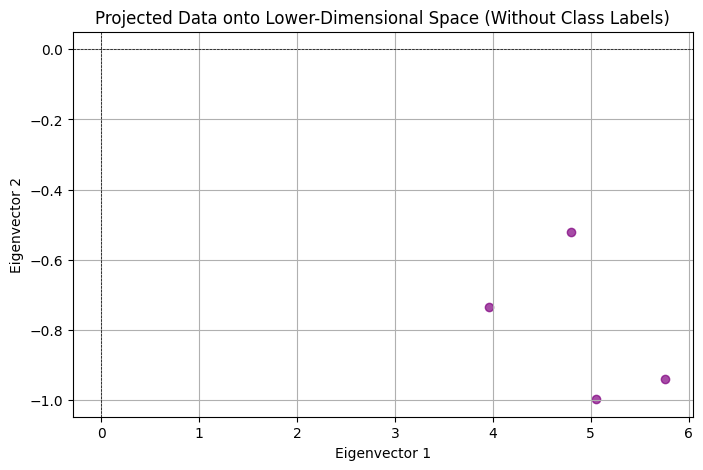

In [ ]:
# Project the original data onto the new lower-dimensional space
class_a_samples = X[X[:, 2] == 'A'][:, :2].astype(float)
class_b_samples = X[X[:, 2] == 'B'][:, :2].astype(float)

# Combine class samples for projection
combined_samples = np.vstack((class_a_samples, class_b_samples))

# Project the combined samples onto the new space defined by the selected eigenvectors
projected_data_X = combined_samples @ selected_eigenvectors
projected_data = np.array(projected_data_X)
# Display the projected data
print("Projected Data onto Lower-Dimensional Space:")
print(projected_data)
projected_data = projected_data[-4:]
print(projected_data)

plt.figure(figsize=(8, 5))
plt.scatter(projected_data[:, 0], projected_data[:, 1], color='purple', alpha=0.7)
plt.title('Projected Data onto Lower-Dimensional Space (Without Class Labels)')
plt.xlabel('Eigenvector 1')
plt.ylabel('Eigenvector 2')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.grid()
plt.show()